In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
x = [[[[1],   [2],  [3],  [4]],
      [[5],   [6],  [7],  [8]],
      [[9],  [10], [11],  [12]],
      [[13], [14], [15],  [16]]]]



In [4]:
x =np.array(x)

In [5]:
sess = tf.InteractiveSession()

In [6]:
x_tf = tf.Variable(x.astype(np.float32))

In [7]:
sess.run(tf.global_variables_initializer())

In [13]:
blocks_np = tf.space_to_batch_nd(x_tf, (2, 2), [[0,0],[0, 0]]).eval()

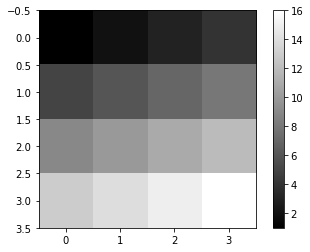

In [5]:
plt.imshow(x[0,:,:,0], cmap='gray')
plt.colorbar()

In [24]:
def space_to_batch(_input, block_shape):
    resh_input = _input.reshape((_input.shape[0], int(_input.shape[1] / block_shape[0]), block_shape[0], 
                                int(_input.shape[2] / block_shape[1]), block_shape[1], _input.shape[3]))
    perm_input = resh_input.transpose((2,4,0,1,3,5))
    output = perm_input.reshape((block_shape[0] * block_shape[1] * _input.shape[0],int(_input.shape[1] / block_shape[0]) , 
                               int(_input.shape[2] / block_shape[1]), _input.shape[3]))
    return output

In [25]:
x.shape

(1, 4, 4, 1)

In [26]:
blocks = space_to_batch(x, (2, 2))

In [27]:
blocks.shape

(4, 2, 2, 1)

In [28]:
blocks

array([[[[ 1],
         [ 3]],

        [[ 9],
         [11]]],


       [[[ 2],
         [ 4]],

        [[10],
         [12]]],


       [[[ 5],
         [ 7]],

        [[13],
         [15]]],


       [[[ 6],
         [ 8]],

        [[14],
         [16]]]])

In [14]:
blocks_np

array([[[[ 1.],
         [ 3.]],

        [[ 9.],
         [11.]]],


       [[[ 2.],
         [ 4.]],

        [[10.],
         [12.]]],


       [[[ 5.],
         [ 7.]],

        [[13.],
         [15.]]],


       [[[ 6.],
         [ 8.]],

        [[14.],
         [16.]]]], dtype=float32)

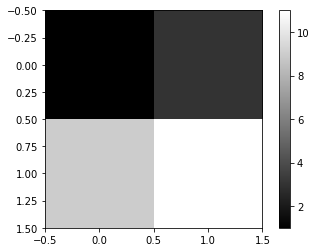

In [29]:
plt.imshow(blocks_np[0,:,:,0], cmap='gray')
plt.colorbar()

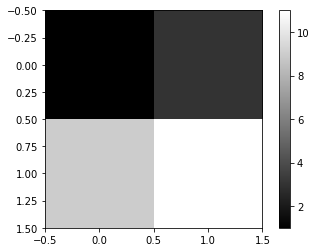

In [30]:
plt.imshow(blocks[0,:,:,0], cmap='gray')
plt.colorbar()